In [1]:
from weaPoints import WeaPoints, InterpolationMethod
from anemosData import TsNcWindData, WindDataKind
import numpy as np
import xarray
import pandas

# Loading power curve

In [2]:
path = r"./wea_data/example/test_wea.nc"
power_curves = xarray.open_dataset(path)
power_curves["test_wea"]

<xarray.DataArray 'test_wea' (wspd: 24502, rho: 3251)>
[79656002 values with dtype=float64]
Coordinates:
  * wspd     (wspd) float64 0.0 0.001 0.002 0.003 0.004 ... 24.5 24.5 24.5 24.5
  * rho      (rho) float64 0.95 0.9501 0.9502 0.9503 ... 1.275 1.275 1.275 1.275
Attributes:
    describtion:    interpolated Leistungskennlinie
    creation_date:  2022-01-25
    author:         Claudius Wehner

# Loading Points

In [3]:
size = 10
lon = np.around(np.random.uniform(6.0, 14.0, size=size),5)
lat = np.around(np.random.uniform(48.0, 55.0, size=size),5)
lat_lon_coor = np.stack((lat, lon), axis=1)
level = np.around(np.random.uniform(80.0, 140.0, size=size),1)

testPoints = WeaPoints(
    lat_lon_coor = lat_lon_coor,
    level = level,
    wea_types = ["test_wea"] * size,
    #interpolation_method = [InterpolationMethod.LINEAR] * size,
)

testPoints.point_list[:5]

[_WeaPoint(lat_lon_coor=array([50.70967,  7.85302]), level=106.3, wea_type='test_wea', x_y_coor=[-202644.12626629975, -16389.9723764308]),
 _WeaPoint(lat_lon_coor=array([52.14772,  9.27447]), level=127.6, wea_type='test_wea', x_y_coor=[-99583.67827197409, 140300.7684475819]),
 _WeaPoint(lat_lon_coor=array([49.07532, 10.32566]), level=94.2, wea_type='test_wea', x_y_coor=[-29860.547398443843, -201766.66827074418]),
 _WeaPoint(lat_lon_coor=array([48.05217,  6.13668]), level=99.4, wea_type='test_wea', x_y_coor=[-341569.9154723238, -304887.6339103422]),
 _WeaPoint(lat_lon_coor=array([53.16158,  9.96461]), level=120.2, wea_type='test_wea', x_y_coor=[-51383.61300382389, 252193.20138712702])]

# Get Time series

In [8]:
testPoints.get_power_output(power_curves=power_curves, time_frame=[2009,"2014-09-20"])

Passed time_frame valid!
time loaded
Windpower turbine 1 complete
Windpower turbine 2 complete
Windpower turbine 3 complete
Windpower turbine 4 complete
Windpower turbine 5 complete
Windpower turbine 6 complete
Windpower turbine 7 complete
Windpower turbine 8 complete
Windpower turbine 9 complete
Windpower turbine 10 complete


<AxesSubplot:>

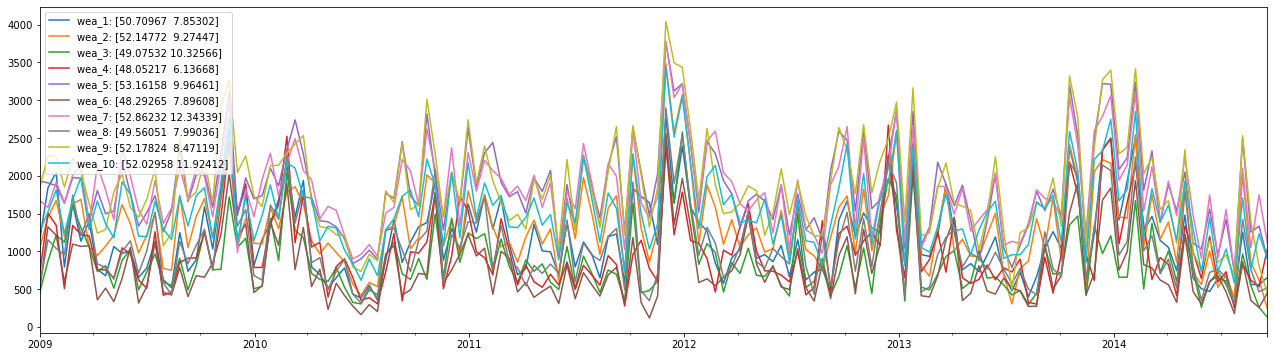

In [9]:
Eout = {}
for num, point in enumerate(testPoints.point_list):
    Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

df = pandas.DataFrame(data=Eout,index=testPoints.time)
df.resample("14d").mean().plot(figsize=(22,6))